In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [565]:
df = pd.read_csv("../Data/pollution_data.csv")
df = df[df['Year'] != 2022]

In [566]:
df.head()

,Year,State,CO,NO2,SO2,O3,PM2.5
0,2002,Alabama,0.671517,5.865513,2.353650,0.044876,14.086733
1,2002,Arizona,0.891101,19.402168,3.720999,0.050519,9.746759
2,2002,Arkansas,0.595566,15.662020,2.640052,0.043574,11.810577
3,2002,California,0.599614,16.339366,1.606644,0.044603,14.396674
4,2002,Colorado,0.706515,16.664983,3.119088,0.050209,8.187605


In [567]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Specify the numeric columns on which you want to apply the IQR method
numeric_columns = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5']

# Remove outliers from the DataFrame
df = remove_outliers_iqr(df, numeric_columns)

print(df)

     Year                 State        CO        NO2       SO2        O3  \
0    2002               Alabama  0.671517   5.865513  2.353650  0.044876   
2    2002              Arkansas  0.595566  15.662020  2.640052  0.043574   
4    2002              Colorado  0.706515  16.664983  3.119088  0.050209   
7    2002  District of Columbia  0.619007   9.832502  2.740460  0.039188   
8    2002               Florida  0.619007   9.832502  2.740460  0.039188   
..    ...                   ...       ...        ...       ...       ...   
974  2021               Vermont  0.192495   5.358652  0.245495  0.036723   
975  2021              Virginia  0.267279   6.767501  0.652737  0.040417   
976  2021            Washington  0.209669  12.578108  0.239083  0.038937   
978  2021             Wisconsin  0.186079   7.655517  0.418579  0.042619   
979  2021               Wyoming  0.104840   2.589008  0.340710  0.049118   

         PM2.5  
0    14.086733  
2    11.810577  
4     8.187605  
7     9.200040  
8 

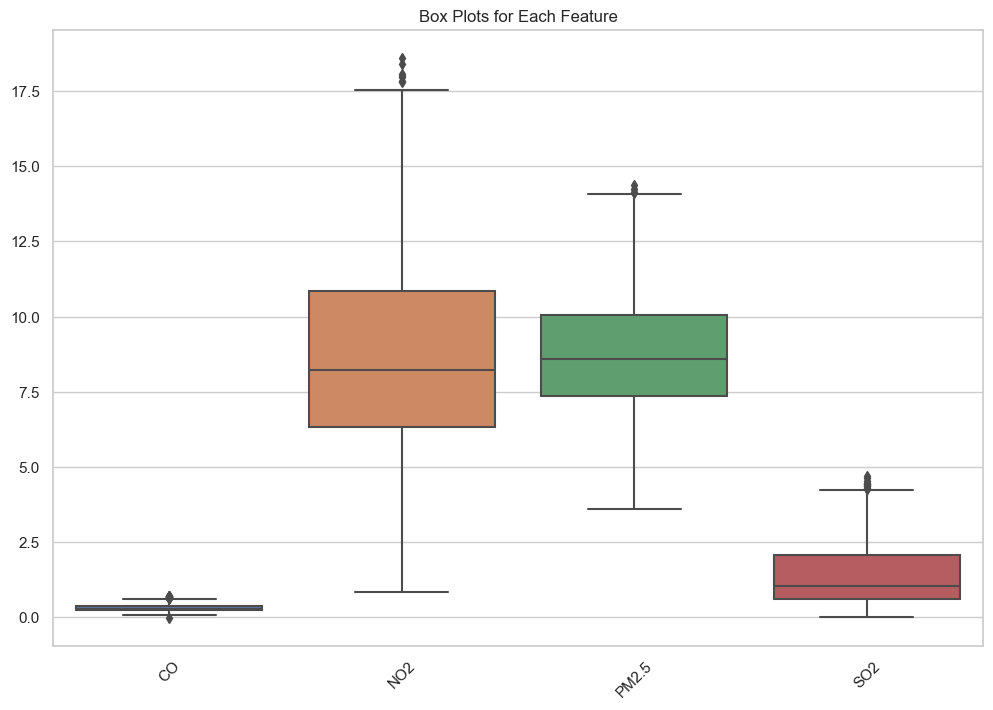

In [568]:
sn.set(style="whitegrid")

plt.figure(figsize=(12, 8))  
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  

plt.show()

In [569]:
# Check for null values and replace with means for each year 
print(df.isnull().sum())
null_counts = df.isnull().sum()
for column in df.columns:
    if null_counts[column] > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64


Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

Exploratory Data Analysis


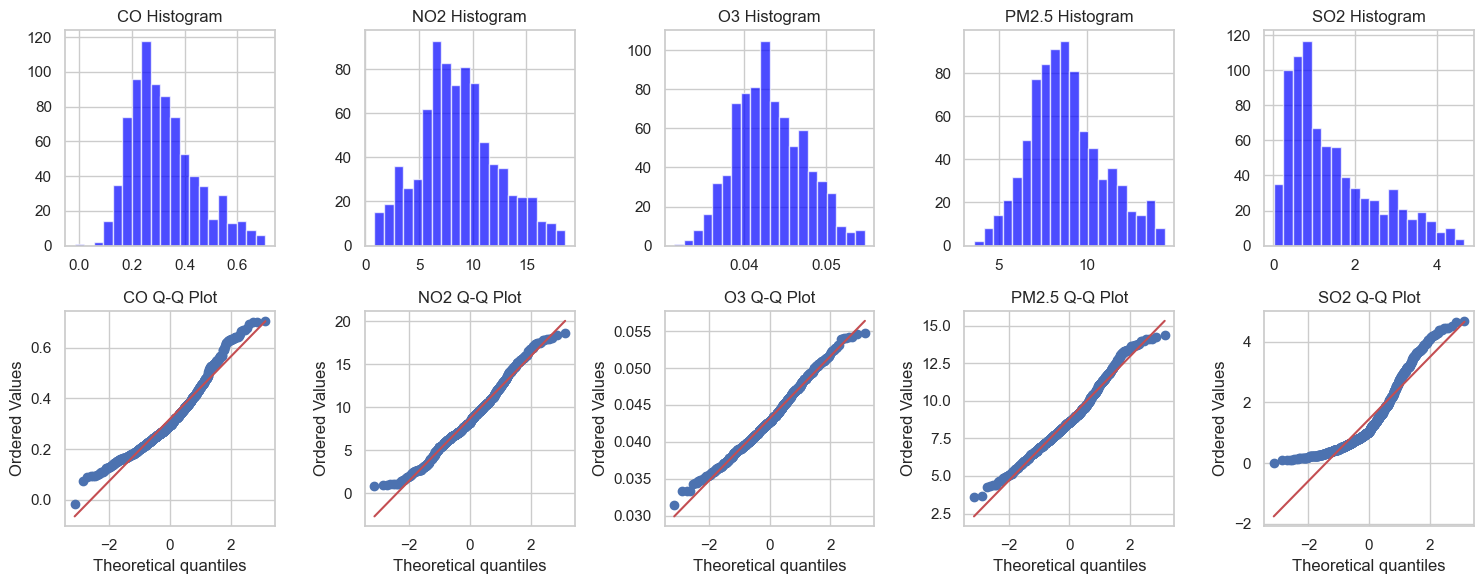

CO is not normally distributed (p-value: 9.821635879165636e-15)
NO2 is not normally distributed (p-value: 0.0011217423509609153)
O3 is not normally distributed (p-value: 0.0007111140081361772)
PM2.5 is not normally distributed (p-value: 1.5836331376844566e-05)
SO2 is not normally distributed (p-value: 6.681666853445693e-22)


In [570]:
# TODO: Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

In [571]:
# from scipy import stats
# transformed_df = df.copy()  # Create a copy to store the transformed values

# numeric_columns = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5']

# for column in numeric_columns:
#     transformed_data, _ = stats.boxcox(df[column] + 1)  # Adding 1 to handle zero or negative values
#     df[column] = transformed_data
    

In [572]:
# # Applying log transform 
# import numpy as np

# df["CO"] = np.log(df["CO"])
# df["NO2"] = np.log(df["NO2"])
# df["PM2.5"] = np.log(df["PM2.5"])
# df["SO2"] = np.log(df["SO2"])
# df["O3"] = np.log(df["O3"])

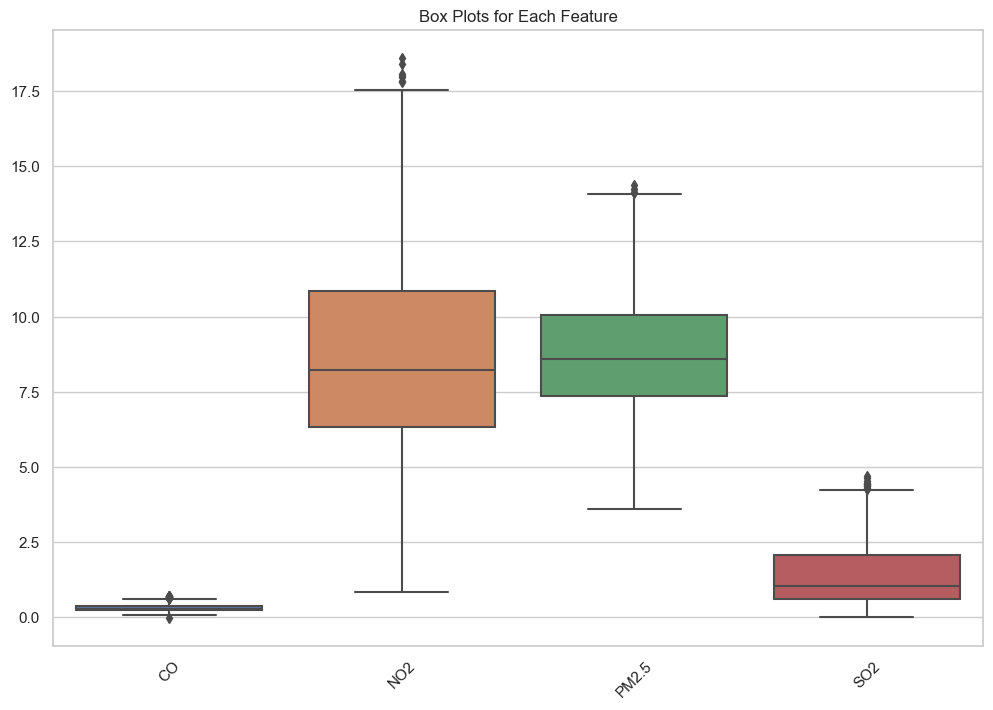

In [573]:
sn.set(style="whitegrid")

plt.figure(figsize=(12, 8))  
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  

plt.show()

In [574]:
# Check for null values and replace with means for each year 
print(df.isnull().sum())
null_counts = df.isnull().sum()
for column in df.columns:
    if null_counts[column] > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64


Year     0
State    0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
dtype: int64

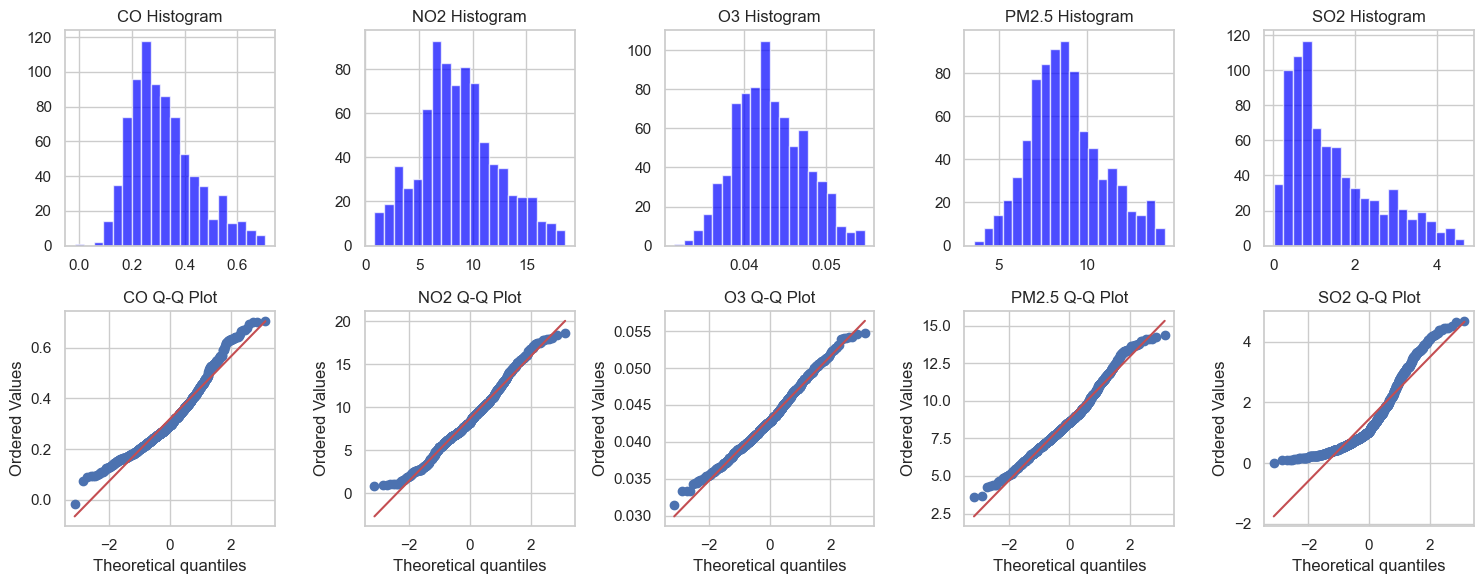

CO is not normally distributed (p-value: 9.821635879165636e-15)
NO2 is not normally distributed (p-value: 0.0011217423509609153)
O3 is not normally distributed (p-value: 0.0007111140081361772)
PM2.5 is not normally distributed (p-value: 1.5836331376844566e-05)
SO2 is not normally distributed (p-value: 6.681666853445693e-22)


In [590]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

In [591]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables (features)
independent_vars = ["CO", "NO2", "O3", "SO2"]

# Calculate VIF for each variable
X = df[independent_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Variable        VIF
0       CO  11.617231
1      NO2   8.884632
2       O3  10.677157
3      SO2   3.920765


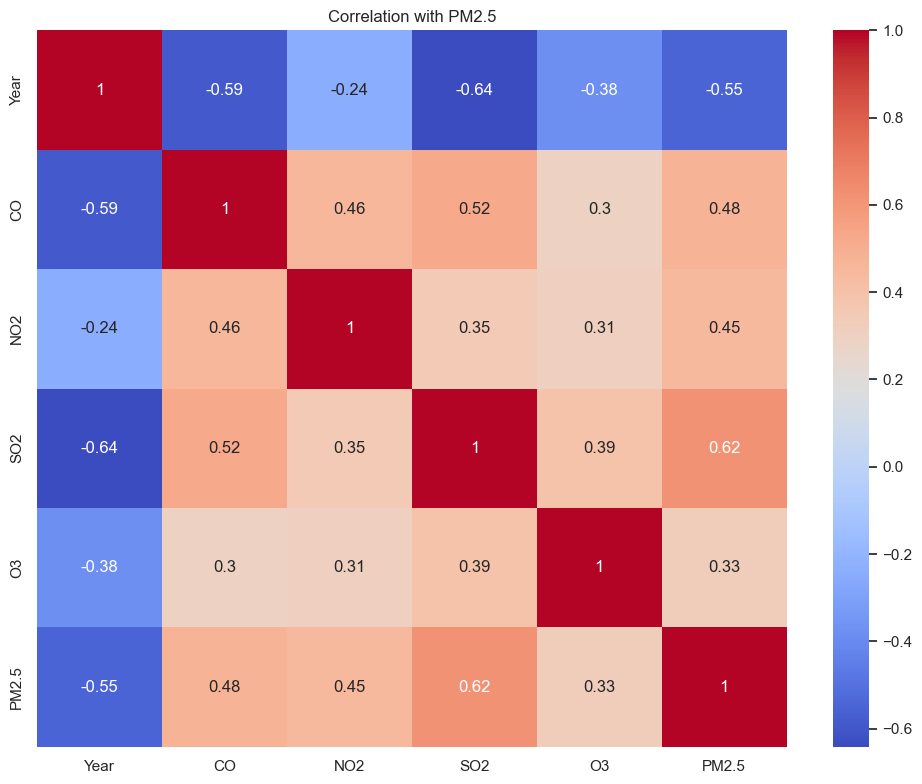

In [592]:
# Drop the 'State' column
corr_df = df.drop(columns=["State"])

# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = corr_df.corrwith(df["PM2.5"])

# Create a correlation matrix for all features
correlation_matrix = corr_df.corr()

# Plot the correlation matrix with 'PM2.5' using a heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation with PM2.5")

plt.tight_layout()
plt.show()

Explained Variance for PC1: 0.5425
Explained Variance for PC2: 0.1860
Explained Variance for PC3: 0.1625
Explained Variance for PC4: 0.1090


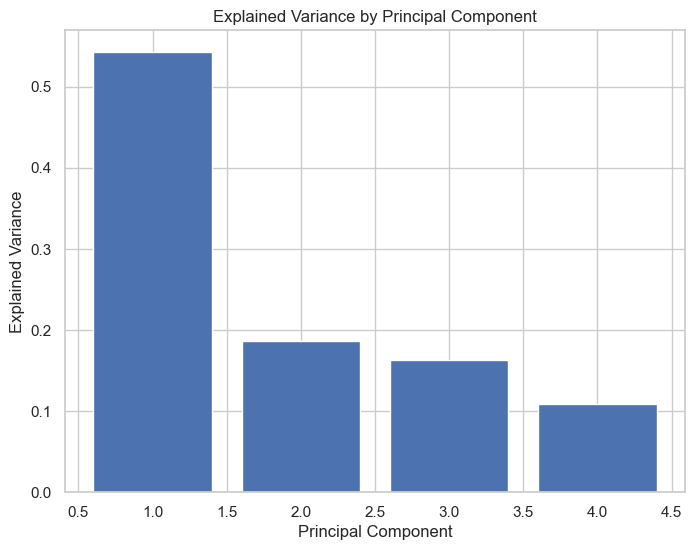

In [593]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with numeric data for PCA
numeric_columns_scale = ["CO", "NO2", "O3", "SO2"]

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA
pca = PCA()

pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {var:.4f}")

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by Principal Component")
plt.show()

In [594]:
print(pca_result)

[[ 1.75918407  0.41365226  1.71001896 -1.78066378]
 [ 2.74288672  1.46399968 -0.14856072 -0.27877847]
 [ 4.28192382  0.58927254 -0.24227967 -0.89894872]
 ...
 [-0.98841825  0.97422822 -1.41540857  0.49735456]
 [-1.27177602 -0.36235402 -0.62182441  0.10136921]
 [-1.65331395 -2.43349812 -0.23606436 -0.28546189]]


In [595]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])

# Add the 'Year' and 'State' columns back if needed
pca_df["Year"] = df["Year"]
pca_df["State"] = df["State"]
pca_df["PM2.5"] = df["PM2.5"]

# Print the DataFrame with the first 3 principal components
print(pca_df)

          PC1       PC2       PC3    Year          State      PM2.5
0    1.759184  0.413652  1.710019  2002.0        Alabama  14.086733
1    2.742887  1.464000 -0.148561     NaN            NaN        NaN
2    4.281924  0.589273 -0.242280  2002.0       Arkansas  11.810577
3    1.657580  1.767016  1.369080     NaN            NaN        NaN
4    1.657580  1.767016  1.369080  2002.0       Colorado   8.187605
..        ...       ...       ...     ...            ...        ...
801 -2.252041  0.579417  0.104985  2018.0          Maine   5.289215
802 -1.157063  0.216225 -0.009362  2018.0       Maryland   7.193926
803 -0.988418  0.974228 -1.415409  2018.0  Massachusetts   6.096706
804 -1.271776 -0.362354 -0.621824  2018.0       Michigan   8.759311
805 -1.653314 -2.433498 -0.236064  2018.0      Minnesota   6.844915

[806 rows x 6 columns]


In [581]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pca_df['Year'] = label_encoder.fit_transform(pca_df['Year'])

In [596]:
# from sklearn.model_selection import train_test_split
# X = pca_df.drop(columns=["PM2.5"])
# y = pca_df["PM2.5"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit with 2 splits
tscv = TimeSeriesSplit(n_splits=2)

for train_index, test_index in tscv.split(pca_df):
    train_data = pca_df.iloc[train_index]
    test_data = pca_df.iloc[test_index]

print(train_data)
print(test_data)

X_train = train_data.drop(columns=["PM2.5", "Year"])
y_train = train_data["PM2.5"]

X_test = test_data.drop(columns=["PM2.5", "Year"])
y_test = test_data["PM2.5"]

          PC1       PC2       PC3    Year       State      PM2.5
0    1.759184  0.413652  1.710019  2002.0     Alabama  14.086733
1    2.742887  1.464000 -0.148561     NaN         NaN        NaN
2    4.281924  0.589273 -0.242280  2002.0    Arkansas  11.810577
3    1.657580  1.767016  1.369080     NaN         NaN        NaN
4    1.657580  1.767016  1.369080  2002.0    Colorado   8.187605
..        ...       ...       ...     ...         ...        ...
533 -0.268526 -0.100063 -1.396701  2012.0     Vermont   6.777832
534 -1.133400  0.999902  0.193981  2012.0    Virginia   8.642230
535 -1.133400  0.999902  0.193981  2012.0  Washington   7.200350
536  1.921042  1.217516 -1.056072     NaN         NaN        NaN
537  0.689867 -0.710163 -0.407058  2012.0   Wisconsin   8.476442

[538 rows x 6 columns]
          PC1       PC2       PC3    Year          State      PM2.5
538  0.161283  0.320696 -1.345322  2012.0        Wyoming   5.641449
539  0.108078 -0.257896  0.161310  2013.0        Alabama   9

In [583]:
# Filter train and test data based on the specified years
# train_data = train_data[train_data['Year'] <= 2012]
# test_data = test_data[(test_data['Year'] >= 2013) & (test_data['Year'] <= 2015)]

# Separate the independent variables (X) and the target variable (y)
# X_train = train_data.drop(columns=["PM2.5", "Year"])
# y_train = train_data["PM2.5"]

# X_test = test_data.drop(columns=["PM2.5", "Year"])
# y_test = test_data["PM2.5"]

In [584]:
X_train.shape

(538, 4)

In [585]:
X_test.shape

(268, 4)

In [586]:
X_train = pd.get_dummies(X_train, columns=["State"], prefix="State")
X_test = pd.get_dummies(X_test, columns=["State"], prefix="State")

In [587]:
X_train

,PC1,PC2,PC3,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_Wisconsin,State_Wyoming
0,1.759184,0.413652,1.710019,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.742887,1.464000,-0.148561,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.281924,0.589273,-0.242280,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.657580,1.767016,1.369080,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.657580,1.767016,1.369080,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,-0.268526,-0.100063,-1.396701,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
534,-1.133400,0.999902,0.193981,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
535,-1.133400,0.999902,0.193981,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
536,1.921042,1.217516,-1.056072,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [588]:
X_test

,PC1,PC2,PC3,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_Wisconsin,State_Wyoming
538,0.161283,0.320696,-1.345322,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
539,0.108078,-0.257896,0.161310,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
540,-1.753909,0.172690,0.196363,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541,-1.173330,-0.600777,0.194473,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
542,-1.058677,-0.254775,-0.173744,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,-2.252041,0.579417,0.104985,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
802,-1.157063,0.216225,-0.009362,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
803,-0.988418,0.974228,-1.415409,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
804,-1.271776,-0.362354,-0.621824,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Building


In [589]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

print("model score on training data:",lr.score(X_train, y_train))
print("model score on test data:",lr.score(X_test, y_test))

ValueError: Input y contains NaN.

In [ ]:
cv_score = cross_val_score(lr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.7055168041930096

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.02950681696819968
Mean absolute error =  0.14698644186406087
Mean Squared error =  0.03431415508077724
Root Mean Sqaured Error=  0.18524080295868198


In [ ]:
cv_score = cross_val_score(dtr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.42825754291236773

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=12)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.29101041359310154
Mean absolute error =  0.12220340916680832
Mean Squared error =  0.025068057193993964
Root Mean Sqaured Error=  0.1583289524818312


In [ ]:
cv_score = cross_val_score(rfr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6305484601723775

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= -0.5814149982020604
Mean absolute error =  0.18642680040498005
Mean Squared error =  0.05591478687758536
Root Mean Sqaured Error=  0.23646307719723467


In [ ]:
cv_score = cross_val_score(lasso, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.08240339223814626

In [ ]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.29101041359310154
Mean absolute error =  0.12220340916680832
Mean Squared error =  0.025068057193993964
Root Mean Sqaured Error=  0.1583289524818312


In [ ]:
cv_score = cross_val_score(knr, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.7085175157214431

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, random_state=0)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

print("model score on training data:",ridge.score(X_train, y_train))
print("model score on test data:",ridge.score(X_test, y_test))

r2score= 0.27809536642243615
Mean absolute error =  0.12962760121080083
Mean Squared error =  0.025524700207297073
Root Mean Sqaured Error=  0.15976451485638815
model score on training data: 0.8556433633508913
model score on test data: 0.27809536642243615


In [ ]:
cv_score = cross_val_score(ridge, X_train, y_train, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_score.mean(), cv_score.std()))

0.71 accuracy with a standard deviation of 0.10


Cosidering the difference between R2 score and cv mean score we get minimum difference with the Linear Regression model.
So we will consider that as the best model.


<b>Hyper parameter Tuning<b>


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {
    "fit_intercept": [True, False],
    "n_jobs": [42, -1, -10, 1, 10, 100, 200, 500, 35, 25],
}

In [ ]:
GCV = GridSearchCV(LinearRegression(), parameter, cv=5)

In [ ]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [42, -1, -10, 1, 10, 100, 200, 500, 35, 25]})

In [ ]:
GCV.best_params_

{'fit_intercept': True, 'n_jobs': 42}

In [ ]:
Final_mod = LinearRegression(fit_intercept=False, n_jobs=42)
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
r2 = r2_score(y_test, pred)
cv_score = cross_val_score(Final_mod, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
print(r2, cv_mean)

print("model score on training data:",Final_mod.score(X_train, y_train))
print("model score on test data:",Final_mod.score(X_test, y_test))

0.27807717019513334 0.7055168041930054
model score on training data: 0.8556433664934637
model score on test data: 0.27807717019513334


## Serialization


In [ ]:
# Saving the model
import joblib

joblib.dump(Final_mod, "PM2.5predictor.pkl")

['PM2.5predictor.pkl']